# Analysis: cross-match to the TNS

TNS = Transient Name Server

In [1]:
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time

At the TNS, search in a generous 10 deg radius near the field centers.

Limit to classified SNe (include FRBs) and select all classification types.

TNS only limits the results view to 50 results, does not paginate well, does not offer to download the full set of results.

Read in the results from the TNS queries.

In [2]:
tns_cosmos = pd.read_csv('tns_search_cosmos.csv')
tns_elais = pd.read_csv('tns_search_elais.csv')

In [3]:
print(len(tns_cosmos), len(tns_elais))

108 19


In [4]:
tns_cosmos.columns

Index(['ID', 'Name', 'RA', 'DEC', 'Obj. Type', 'Repeater of Primary Burst',
       'DM', 'DM-Err', 'DM-Units', 'Gal. DM Limit', 'Gal. DM Model',
       'Barycentric Datetime', 'Redshift', 'Host Name', 'Host Redshift',
       'Reporting Group/s', 'Discovery Data Source/s', 'Classifying Group/s',
       'Associated Group/s', 'Disc. Internal Name', 'Disc. Instrument/s',
       'Class. Instrument/s', 'TNS AT', 'Public', 'End Prop. Period',
       'Discovery Mag/Flux', 'Discovery Filter', 'Discovery Date (UT)',
       'Sender', 'Remarks', 'Discovery Bibcode', 'Classification Bibcodes',
       'Ext. catalog/s'],
      dtype='object')

Create `coords` columns.

In [5]:
tns_cosmos['coords'] = SkyCoord(tns_cosmos['RA'], tns_cosmos['DEC'], frame='icrs', unit=(u.hourangle, u.deg))
tns_elais['coords'] = SkyCoord(tns_elais['RA'], tns_elais['DEC'], frame='icrs', unit=(u.hourangle, u.deg))

Read in the candidate coordinates.

In [6]:
fnm = '../all_nightly_epochs_files/candidate_coordinates.dat'
cc_id = np.loadtxt(fnm, dtype='str', usecols=(0))
cc_ra = np.loadtxt(fnm, dtype='float', usecols=(1))
cc_dec = np.loadtxt(fnm, dtype='float', usecols=(2))

In [7]:
cc_coords = SkyCoord(cc_ra, cc_dec, frame='icrs', unit=u.deg)

Index the COSMOS and ELAIS candidates.

First define the field boundaries (roughly).

In [8]:
c_ra_l = 148
c_ra_h = 152
c_de_l = 0.0
c_de_h = 4.5
e_ra_l = 6.0
e_ra_h = 11.2
e_de_l = -45.5
e_de_h = -41.5

In [9]:
cx = np.where((cc_ra > c_ra_l) & (cc_ra < c_ra_h) & (cc_dec > c_de_l) & (cc_dec < c_de_h))[0]
ex = np.where((cc_ra > e_ra_l) & (cc_ra < e_ra_h) & (cc_dec > e_de_l) & (cc_dec < e_de_h))[0]

Plot overlap for COSMOS, then ELAIS.

1 SN 2023dyl
2 SN 2022adxs
3 SN 2022xil
4 SN 2022and
5 SN 2021adwh
6 SN 2021ghc
7 SN 2021bnv


<bound method Figure.show of <Figure size 300x200 with 1 Axes>>

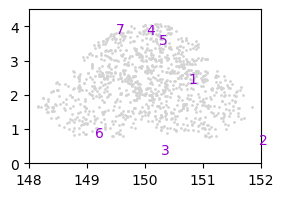

In [10]:
fig = plt.figure(figsize=(3, 2))
plt.plot(cc_ra[cx], cc_dec[cx], '.', ms=2, color='lightgrey')
tmp = 1
for coord, name in zip(tns_cosmos['coords'], tns_cosmos['Name']):
    ra = coord.ra.deg
    dec = coord.dec.deg
    if (ra > c_ra_l) & (ra < c_ra_h) & (dec > c_de_l) & (dec < c_de_h):
        print(tmp, name)
        plt.text(ra, dec, tmp, color='darkviolet')
        tmp += 1
    del ra, dec
plt.xlim([c_ra_l, c_ra_h])
plt.ylim([c_de_l, c_de_h])
fig.show

SN 2023tfc


<bound method Figure.show of <Figure size 300x200 with 1 Axes>>

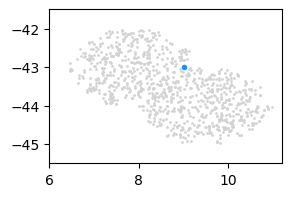

In [11]:
fig = plt.figure(figsize=(3, 2))
plt.plot(cc_ra[ex], cc_dec[ex], '.', ms=2, color='lightgrey')
for coord, name in zip(tns_elais['coords'], tns_elais['Name']):
    ra = coord.ra.deg
    dec = coord.dec.deg
    if (ra > e_ra_l) & (ra < e_ra_h) & (dec > e_de_l) & (dec < e_de_h):
        print(name)
        plt.plot(ra, dec, '.', color='dodgerblue')
    del ra, dec
plt.xlim([e_ra_l, e_ra_h])
plt.ylim([e_de_l, e_de_h])
fig.show

OK so just a few potentials.

In [12]:
tns_c_names = np.asarray(['SN 2023dyl', 'SN 2022adxs', 'SN 2022xil',
                          'SN 2022and', 'SN 2021adwh', 'SN 2021ghc',
                          'SN 2021bnv'], dtype='str')
tns_e_names = np.asarray(['SN 2023tfc'], dtype='str')

In [13]:
for name in tns_c_names:
    tx = np.where(tns_cosmos['Name'] == name)[0]
    coord = tns_cosmos['coords'][tx[0]]
    discd = tns_cosmos['Discovery Date (UT)'][tx[0]]
    discm = tns_cosmos['Discovery Mag/Flux'][tx[0]]
    del tx
    idx, sep2d, sep3d = coord.match_to_catalog_sky(cc_coords)
    print('%15s %25s %6.3f %12s %13.8f' % (name, discd, discm, cc_id[idx], sep2d[0].arcsec))
    del idx, sep2d, sep3d

     SN 2023dyl   2023-03-27 02:49:58.656 18.301    DC23klgla    0.10905249
    SN 2022adxs   2022-12-22 07:23:57.120 19.251      DC21sap 2597.87181147
     SN 2022xil   2022-10-10 12:18:43.200 19.170    DC22eawan 2245.02198543
     SN 2022and   2022-01-27 10:49:26.400 18.965      DC21rcr   38.17160714
    SN 2021adwh   2021-11-03 12:29:46.000 20.439    DC22eathc    0.15902037
     SN 2021ghc   2021-03-19 08:44:09.600 19.669      DC21fwk  682.91179676
     SN 2021bnv   2021-02-03 09:17:16.800 18.570    DC21bwbfe    0.18806831


In [14]:
for name in tns_e_names:
    tx = np.where(tns_elais['Name'] == name)[0]
    coord = tns_elais['coords'][tx[0]]
    discd = tns_elais['Discovery Date (UT)'][tx[0]]
    discm = tns_elais['Discovery Mag/Flux'][tx[0]]
    del tx
    idx, sep2d, sep3d = coord.match_to_catalog_sky(cc_coords)
    print('%15s %25s %6.3f %12s %13.8f' % (name, discd, discm, cc_id[idx], float(sep2d[0].arcsec)))
    del idx, sep2d, sep3d

     SN 2023tfc   2023-09-17 22:01:14.592 19.247    DC21ctnsk  285.25150781


Take a closer look. Only three being matched within one arcsec isn't that weird, though.

Do lazy no grid.

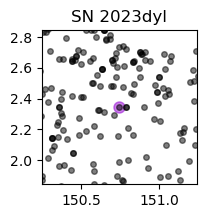

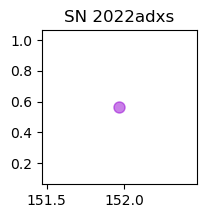

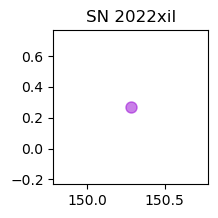

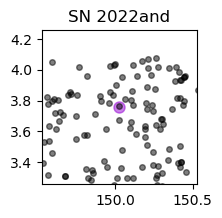

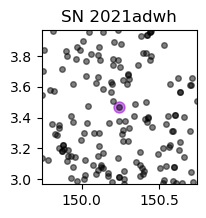

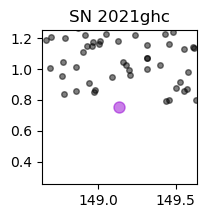

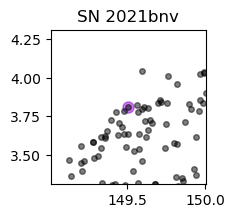

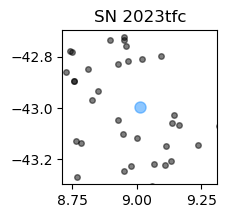

In [15]:
for name in tns_c_names:
    tx = np.where(tns_cosmos['Name'] == name)[0]
    coord = tns_cosmos['coords'][tx[0]]
    ra = coord.ra.deg
    dec = coord.dec.deg
    
    fig = plt.figure(figsize=(2, 2))
    plt.plot(ra, dec, 'o', alpha=0.5, ms=8, color='darkviolet')
    plt.plot(cc_ra, cc_dec, 'o', alpha=0.5, ms=4, color='black')
    plt.xlim([ra-0.5, ra+0.5])
    plt.ylim([dec-0.5, dec+0.5])
    plt.title(name)
    fig.show

for name in tns_e_names:
    tx = np.where(tns_elais['Name'] == name)[0]
    coord = tns_elais['coords'][tx[0]]
    ra = coord.ra.deg
    dec = coord.dec.deg
    
    fig = plt.figure(figsize=(2, 2))
    plt.plot(ra, dec, 'o', alpha=0.5, ms=8, color='dodgerblue')
    plt.plot(cc_ra, cc_dec, 'o', alpha=0.5, ms=4, color='black')
    plt.xlim([ra-0.3, ra+0.3])
    plt.ylim([dec-0.3, dec+0.3])
    plt.title(name)
    fig.show

In the field, out of the field, or on the edge?

COSMOS:
```
SN 2023dyl   in
SN 2022adxs  out
SN 2022xil   out
SN 2022and   in
SN 2021adwh  in
SN 2021ghc   edge
SN 2021bnv   in
```

ELAIS
```
SN 2023tfc   in
```

So there are five TNS SNe which were in the field, and we should check if we were observing when they were discovered.

Continue with these four in COSMOS.
```
SN 2023dyl   in
SN 2022and   in
SN 2021adwh  in
SN 2021bnv   in
```

And this one in ELAIS.
```
SN 2023tfc   in
```


In [16]:
tns_c_infield = np.asarray(['SN 2023dyl', 'SN 2022and', 'SN 2021adwh', 'SN 2021bnv'], dtype='str')
tns_e_infield = np.asarray(['SN 2023tfc'], dtype='str')

Read in the nightly epoch limiting magnitudes.

In [17]:
fnm = '../all_nightly_epochs_files/nightly_epoch_magnitude_limits.dat'
lim_field = np.loadtxt(fnm, dtype='str', usecols=(0))
lim_cdate = np.loadtxt(fnm, dtype='str', usecols=(1))
lim_mjd   = np.loadtxt(fnm, dtype='float', usecols=(2))
lim_filt  = np.loadtxt(fnm, dtype='str', usecols=(3))
lim_mag   = np.loadtxt(fnm, dtype='float', usecols=(5))

Plot the limits as a function of MJD and then overplot the discovery dates.

In [18]:
all_filters = ['g', 'r', 'i']
all_colors = ['green', 'red', 'blue']

<bound method Figure.show of <Figure size 1000x300 with 1 Axes>>

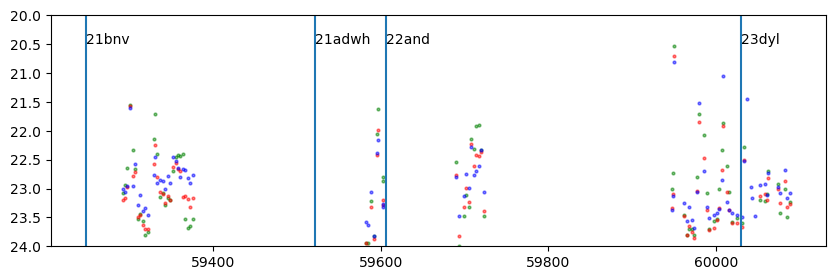

In [19]:
fig = plt.figure(figsize=(10, 3))
for f, filt in enumerate(all_filters):
    fx = np.where((lim_field == 'COSMOS') & (lim_filt == filt))[0]
    plt.plot(lim_mjd[fx], lim_mag[fx], 'o', alpha=0.5, ms=2, color=all_colors[f])
    del fx

for i, name in enumerate(tns_c_infield):
    tx = np.where(tns_cosmos['Name'] == name)[0]
    discd = tns_cosmos['Discovery Date (UT)'][tx[0]]
    tmp = discd.find(' ')
    tmp2 = discd[:tmp]+'T'+discd[tmp+1:]
    time = Time(tmp2, format='isot', scale='utc')
    plt.axvline(time.mjd)
    plt.text(time.mjd, 20.5, name[5:])
    del tx, discd, tmp, tmp2, time

plt.ylim([24.0, 20.0])
fig.show

<bound method Figure.show of <Figure size 1000x300 with 1 Axes>>

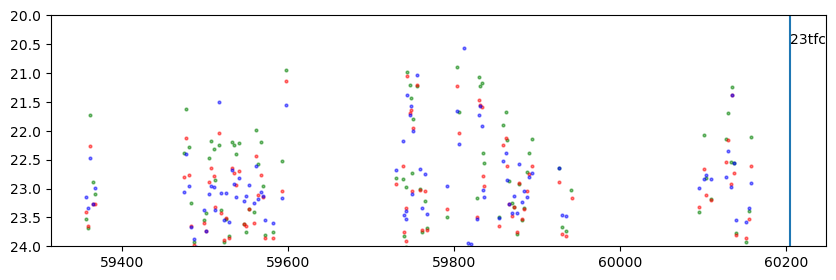

In [20]:
fig = plt.figure(figsize=(10, 3))
for f, filt in enumerate(all_filters):
    fx = np.where((lim_field == 'ELAIS') & (lim_filt == filt))[0]
    plt.plot(lim_mjd[fx], lim_mag[fx], 'o', alpha=0.5, ms=2, color=all_colors[f])
    del fx

for i, name in enumerate(tns_e_infield):
    tx = np.where(tns_elais['Name'] == name)[0]
    discd = tns_elais['Discovery Date (UT)'][tx[0]]
    tmp = discd.find(' ')
    tmp2 = discd[:tmp]+'T'+discd[tmp+1:]
    time = Time(tmp2, format='isot', scale='utc')
    plt.axvline(time.mjd)
    plt.text(time.mjd, 20.5, name[5:])
    del tx, discd, tmp, tmp2, time

plt.ylim([24.0, 20.0])
fig.show

Alright so SN 2023dyl in COSMOS, DC23klgla, was the only one we could have detected, and did.

In [21]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'
candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))
del fnm

<bound method Figure.show of <Figure size 600x300 with 1 Axes>>

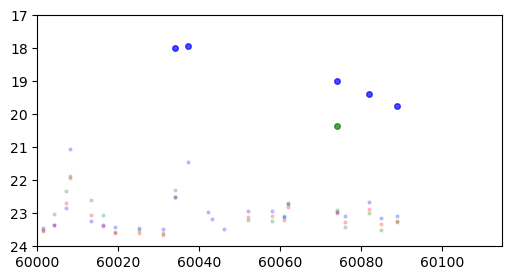

In [22]:
fig = plt.figure(figsize=(6, 3))
for f, filt in enumerate(all_filters):
    fx = np.where((lim_field == 'COSMOS') & (lim_filt == filt))[0]
    plt.plot(lim_mjd[fx], lim_mag[fx], 'o', alpha=0.2, ms=2, color=all_colors[f])
    del fx
    
    fx = np.where((candLC_candid == 'DC23klgla') & (candLC_filter == filt))[0]
    plt.plot(candLC_mjd[fx], candLC_mag[fx], 'o', alpha=0.7, ms=4, color=all_colors[f])
    del fx

plt.ylim([24.0, 17.0])
plt.xlim([60000, 60115])
fig.show

WTF happened to this LC?

DC23klgla

https://www.legacysurvey.org/viewer/cutout.jpg?ra=150.744392176889&dec=2.34338863248595&layer=ls-dr9&pixscale=0.06

https://decat-webap.lbl.gov/decatview.py/cand/DC23klgla

Definitely missing photometry.

From TNS, can see the ZTF name is ZTF23aadwjtg.

From ALeRCE, can grab the photometry and take a look.

In [23]:
jtg_dets = pd.read_csv('ZTF23aadwjtg_detections.csv')
jtg_nondets = pd.read_csv('ZTF23aadwjtg_nondetections.csv')

In [24]:
jtg_dets.columns

Index(['tid', 'mjd', 'candid', 'fid', 'pid', 'diffmaglim', 'isdiffpos', 'nid',
       'distnr', 'magpsf', 'magpsf_corr', 'magpsf_corr_ext', 'magap',
       'magap_corr', 'sigmapsf', 'sigmapsf_corr', 'sigmapsf_corr_ext',
       'sigmagap', 'sigmagap_corr', 'ra', 'dec', 'rb', 'rbversion', 'drb',
       'magapbig', 'sigmagapbig', 'rfid', 'has_stamp', 'corrected', 'dubious',
       'candid_alert', 'step_id_corr', 'phase', 'parent_candid'],
      dtype='object')

The fid column is filter. 1 is g and 2 is r.

In [25]:
# jtg_dets

<bound method Figure.show of <Figure size 600x300 with 1 Axes>>

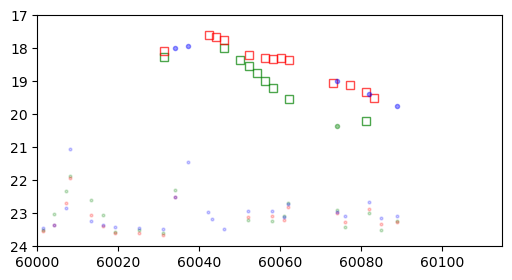

In [26]:
fig = plt.figure(figsize=(6, 3))
for f, filt in enumerate(all_filters):
    fx = np.where((lim_field == 'COSMOS') & (lim_filt == filt))[0]
    plt.plot(lim_mjd[fx], lim_mag[fx], 'o', alpha=0.2, ms=2, color=all_colors[f])
    del fx
    
    fx = np.where((candLC_candid == 'DC23klgla') & (candLC_filter == filt))[0]
    plt.plot(candLC_mjd[fx], candLC_mag[fx], 'o', alpha=0.4, ms=3, color=all_colors[f])
    del fx
    
    if filt == 'g':
        fx = np.where(jtg_dets['fid'] == 1)[0]
    elif filt == 'r':
        fx = np.where(jtg_dets['fid'] == 2)[0]
    if (filt == 'g') | (filt == 'r'):
        plt.plot(jtg_dets['mjd'][fx], jtg_dets['magpsf'][fx], 's', alpha=0.7, ms=6, mec=all_colors[f], color='none')
        del fx

plt.ylim([24.0, 17.0])
plt.xlim([60000, 60115])
fig.show

Well this is a mystery, should've been able to detect the full light curve here pretty much.